<a href="https://colab.research.google.com/github/carlocamilloni/Structural-Bioinformatics/blob/main/Notebooks/t07_StructurePred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Protein Structure Prediction

The aim of these exercises is to familiarise with structure prediction tools and to use them to make hypothesis about the structure and function of proteins. The reference theory is that of Lecture 8:

*   https://github.com/carlocamilloni/Structural-Bioinformatics/blob/main/Notes/08_StructurePredictionDocking.pdf

In this notebook you will try to characterize one protein from its sequence using multiple tools. In particular we will work on proteins from the human papilloma virus (HPV). You will perform

1.   Secondary structure prediction
2.   Structure prediction by Homology Modelling
3.   Structure prediction by AlphaFold2
4.   Structure prediction by AlphaFold3
5.   Structure comparisons using FoldSeek

In [ ]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
local_path='/content/drive/MyDrive/Structural_Bioinformatics/Task7'
%cd {local_path}

Now you can choose one among these sequences on which you will work. To choose it set the seq variable in the following:

*   P27962
*   P27963
*   P27964
*   P27965

You can learn more about these proteins checking them on www.uniprot.org


In [ ]:
# XXX is the protein you choose
seq='.fasta'

In [ ]:
#get the sequence you choose as:
!wget https://www.uniprot.org/uniprot/{seq}

In [ ]:
#Installing biopython using pip
!pip install biopython

Biopython is an excellent companion for working with DNA and protein sequences and also with structures. Here, we will show how to use it for reading a protein sequence file.


In [ ]:
import os
from pathlib import Path
from Bio import SeqIO, Entrez
# read your protein sequence
aaseq = SeqIO.read(seq, format="fasta")

What is great about SeqIO is that you can use it to manipulate your sequence (e.g. sorting, changing formats, etc) and also to print information about your sequence, such as its description, sequence and accession ID.
You can try these commands below by first writing "aaseq." and then selecting one of the autocomplete options suggested by Google Colab. With this information, try to obtain the information requested below.

In [ ]:
#Printing the number of amino acids as an example
print("Sequence length (aa):")
print(len(aaseq))

In [ ]:
#Printing the description of the sequence
print("The description of the sequence is:")
print(aaseq.description)

#Printing the accession ID of the sequence
print("The ID of the sequence is:")
print(aaseq.id)

#Printing the sequence
print("The sequence is:")
print(aaseq.seq)

## Secondary Structure Prediction

Now we can begin with a secondary structure prediction from the sequence. For this we will use S4PRED (https://github.com/psipred/s4pred)

In [ ]:
%cd {local_path}

In [ ]:
# we need to download and install s4pred
!git clone --depth 1 https://github.com/psipred/s4pred
%cd s4pred
!wget http://bioinfadmin.cs.ucl.ac.uk/downloads/s4pred/weights.tar.gz
!tar -xvzf weights.tar.gz

In [ ]:
# Install: PyTorch
# this can be long...
!pip install torch==1.11.0+cu102 -f https://download.pytorch.org/whl/torch_stable.html

Now we can run the prediction over our fasta sequence and save it in a text file. You can then double click on the file to see the results

In [ ]:
%cd {local_path}
!python s4pred/run_model.py {seq} > ss.{seq}.txt
%ls ss.{seq}.txt

The file is made of three columns that report the secondary structure prediction and are COIL/HELIX/EXTENDED, we can now load and plot the results

In [ ]:
import pandas as pd
# here we are giving the titles to the columns of the file
header_list = ["position", "sequence", "ss", "coil", "helix","extended"]
# here we are reading the file skipping the first two lines
# you need to set your file name
data = pd.read_csv('ss.'+str(seq)+'.txt',sep='\s+',skiprows=2,names=header_list)
data = pd.DataFrame(data)

import matplotlib.pyplot as plt
#we are generating three plots calling each column with its name
#and setting the properties of the plot (e.g. the color of the line)
#plt.plot(data['position'], data['coil'], color='black')
plt.plot(data['position'], data['helix'], color='blue')
plt.plot(data['position'], data['extended'], color='red')
#show the plot now
plt.show()

you can check how to improve the plot looking for matplotlib plot example. This plot can be used to describe what the secondary structure of the protein can be

## Structure Prediction using Homology Modelling (SwissModel)

Homology Modelling is the modelling of a protein structure by means of its sequence homology with proteins of known strucutre. The idea is that if a sequence is homologuous to anouther sequence whose structure is known, we can determine the new structure building on the known one. This has been known to be working well since 1990 or so. A state-of-the-art algorithm is available from **SwissModel**:

*   https://swissmodel.expasy.org/

and a tutorial explaining how it work (but you can try to directly use the server if you want) is here: https://swissmodel.expasy.org/docs/examples.

What you need is your protein sequence.



## Structure Prediction using AlphaFold2


Here you will try to predict your structure using alphafold. Prepare a folder to save your data. Open the google colab at this link
https://colab.research.google.com/github/sokrypton/ColabFold/blob/main/AlphaFold2.ipynb
and save it locally before moving on



Depending on the length of your sequence alphafold can take around 30 minutes.

The following part is taken from: https://www.nature.com/articles/s41596-024-01060-5

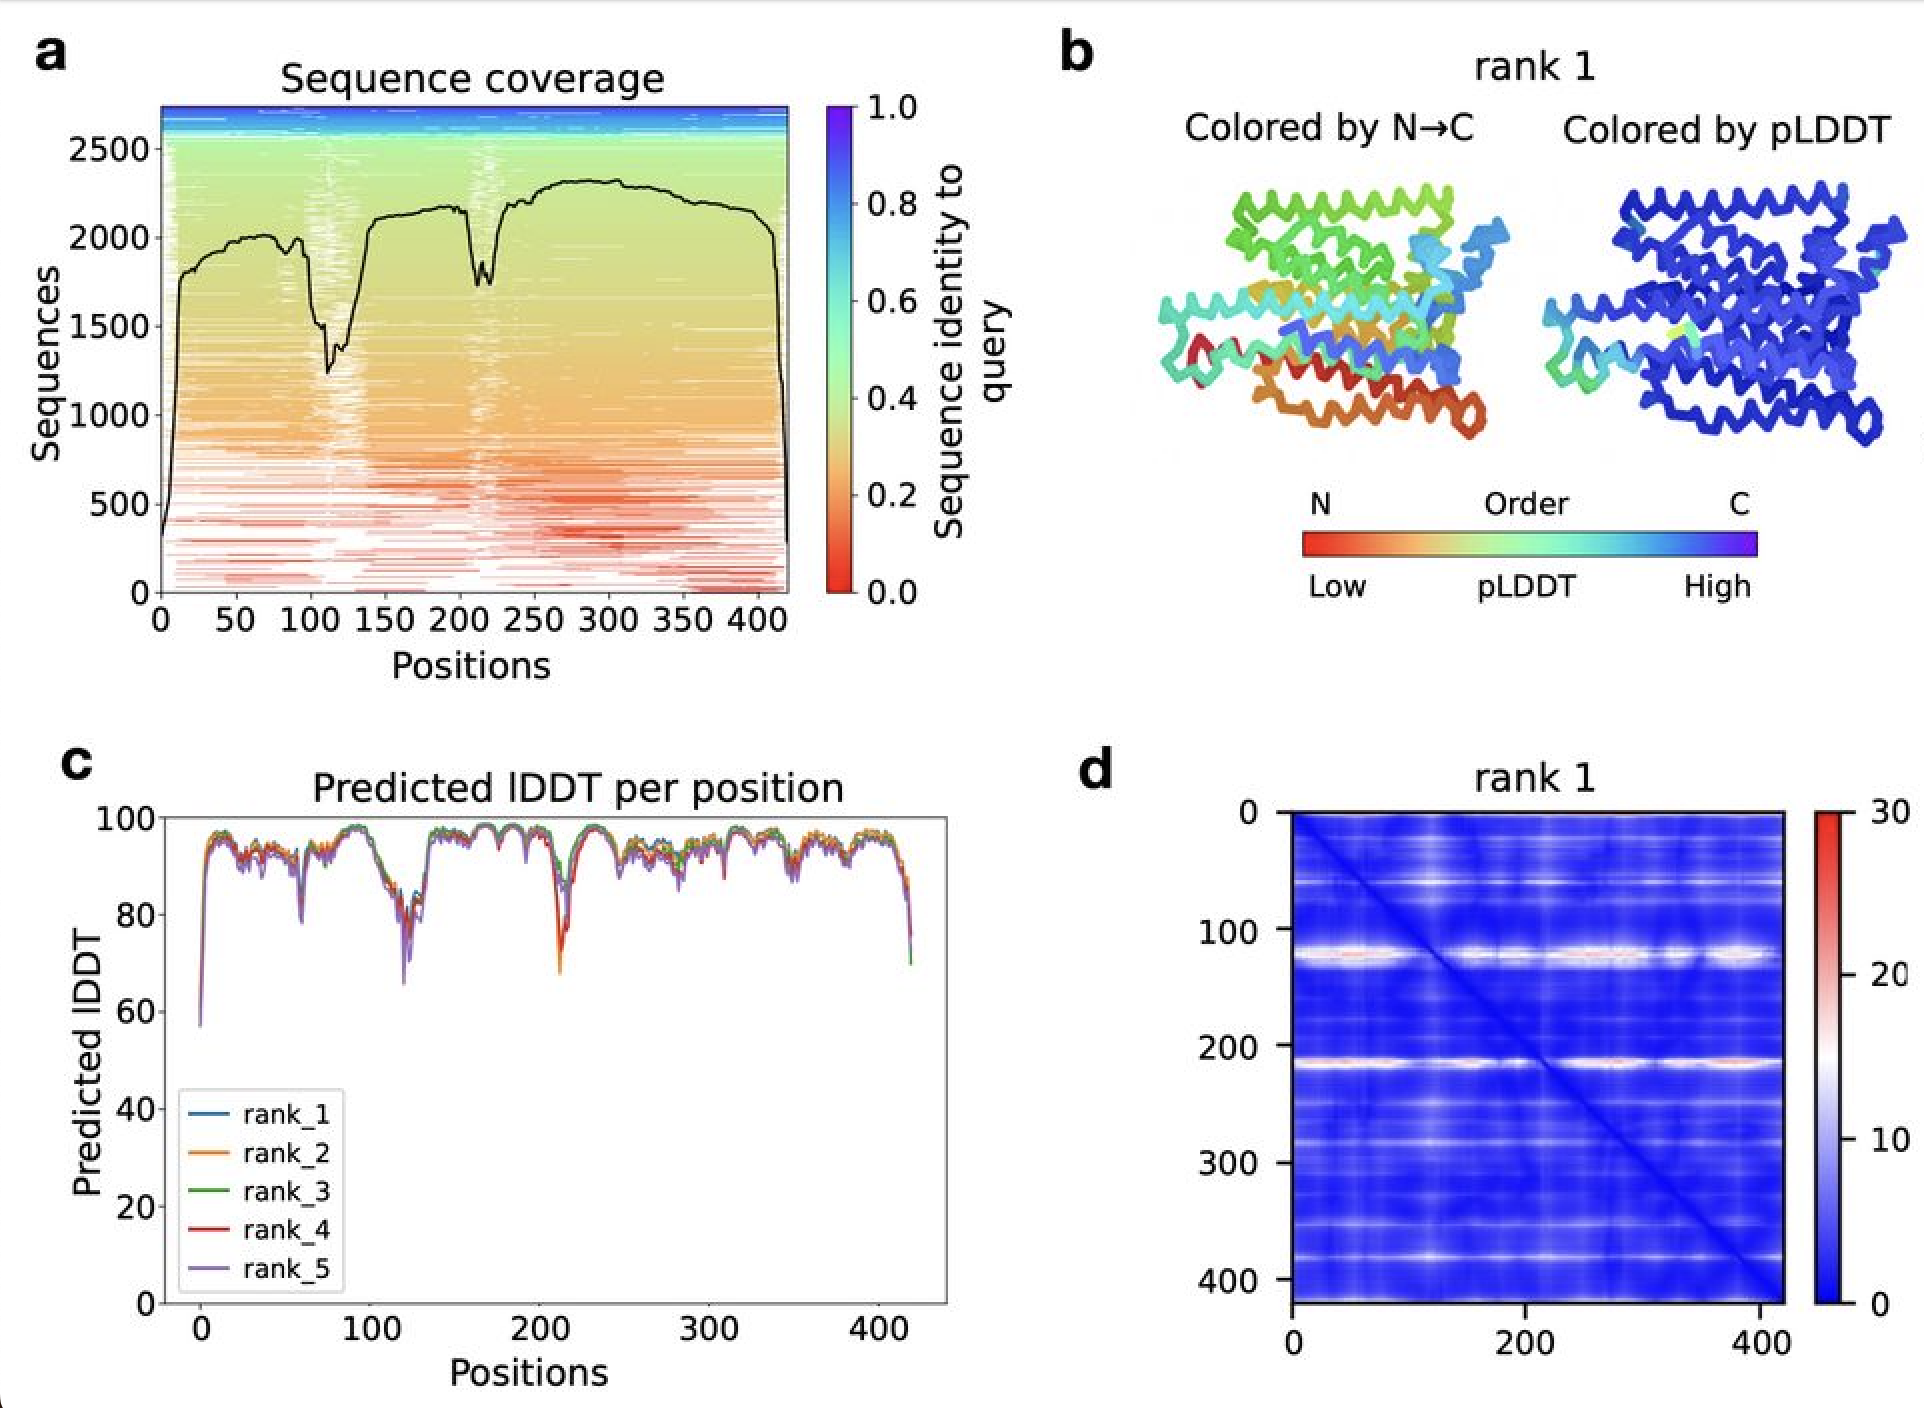


**Using the appropriate confidence measure**

ColabFold computes various confidence measures: pLDDT, PAE, pTM and ipTM (see Box 3 for an outline of their computation). Since pLDDT is a local measure, it’s not sensitive to the placement of each domain in a multi-domain protein. Therefore, a high pLDDT score does not ensure high confidence in the entire structure. In the case of proteins with multiple domains, a high pLDDT alongside a low pTM score could suggest that individual domains are predicted accurately, however, their relative orientation to each other is not. We therefore recommend considering pLDDT in combination with pTM. When using a complex model, ColabFold will rank the predicted protein models by the formula: 0.2×pTM + 0.8×ipTM.

**ColabFold’s sequence coverage plot**

The sequence coverage plot (example: Fig. 4a) illustrates the per residue coverage and diversity, measured as sequence identity to the query (qid). Coverage represents the number of homologous sequences detected per residue and is indicated as a black line in the plot. The x-axis indicates the position within the query sequence and the y-axis - the MSA coverage. The upper limit of the y-axis corresponds to the MSA depth. In most cases, a minimum coverage of 30 sequences for most query residues is required for accurate prediction, preferably over 100 sequences per residue. Next, qid indicates the sequence similarity (reflecting evolutionary distance) between each homolog and the query, where higher qid values indicate higher similarity. ColabFold encodes qid as a color, ranging from red (low) to blue (high). Each homologous sequence is illustrated as a horizontal line, where only segments aligned with the query are visualized in color. MSAs with similar proportions of high and low qid homologs, are preferable since homologs of varying evolutionary distances contribute different insights about the structure.

**ColabFold’s pLDDT plot**

The pLDDT scores computed for each amino-acid are plotted by ColabFold in a single plot for the five predicted protein models (example: Fig. 4c). On the x-axis are the query’s amino-acids and on the y-axis are their pLDDT scores in each of the models (encoded in color).

**ColabFold’s PAE plot**

The PAE scores are computed for each of the query’s residues over all other residues (Box 3) and thus can be plotted as a square in the dimensions of the query length (example: Fig. 4d). On the x-axis are the scored residues, on the y-axis are the points of alignment and the color reflects the PAE value (note the non-standard y-axis, with lower values on top). PAE scores are not symmetric, meaning that the score at position (x,y) is generally not equal to that at (y,x). Good scores (low) are colored in blue and bad (high) - in red. When examining a PAE plot, it is recommended to start by scanning the diagonal. Blue squares along the diagonal most likely indicate a well-predicted domain39. See “Predicted aligned error tutorial” in https://alphafold.ebi.ac.uk/entry/Q5VSL9 for an additional example for interpreting PAE plots.

**Visualisation and Convergence of the Prediction**

Once you have all the PDB structures you can compare them using VMD. AF2 predictions may all be ranked as good prediction but as a rule if the predictions are different (i.e., large RMSD among the structures) then they cannot be considered as valid.

You can load your 5 predictions in VMD and superimpose them using the menu Extension->Analysis->RMSD Trajectory. There use first ALIGN and then RMSD. In this way you will have your structure superimposed and you will have a number of how much they differ from the first.

## Structure Prediction by AlphaFold3

Your same sequence can also be used for structure prediction using the AlphaFold3 web server that you can find here:

https://alphafoldserver.com/

**What is relevant is that in this case you can also model lipids, ions, nucleic acid. If your protein requires it you can try to add these element to your prediction.**

## Structure comparison by FoldSeek

Once you have determined the structure of a protein you may find it usefull to search for proteins with the same structure irrespectively of their sequence. This can be performed by sequence blind structure alignment.

From such analysis you may:

*   Get ideas about your protein function
*   Get ideas about your protein interactions
*   Get a feeling of protein/sequence relationship



For **FoldSeek** (https://search.foldseek.com/search) to work you need to upload there a PDB structure you have generated. Chose the one among those you have obtained that you think is more likely to be correct.